## TITANIC CLASSIFICATION

- We are to Make a system that will tells us whether a person will be saved from sinking or not
- Bring out factors that will most likely lead to success-socio-economic status, Age, Gender and More...

In [113]:
# libries importations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [32]:
# Loading our data set from github
data_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [51]:
# creating a copy of the data set to work with
data = data_df.copy()

In [52]:
# Exploratory data Analysis

In [53]:
# visualising the first 5 lines of our dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
# getting the information of our dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [55]:
# missing values in each column

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

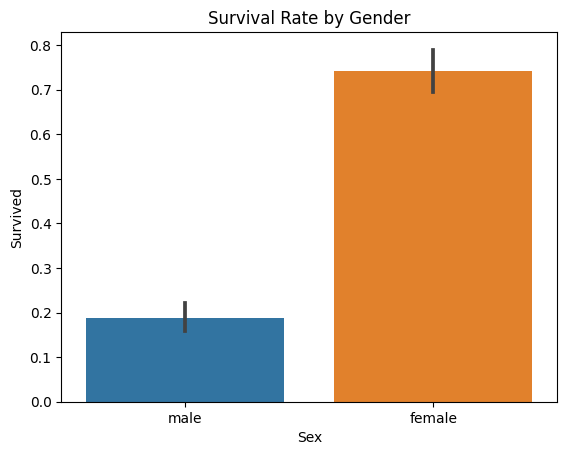

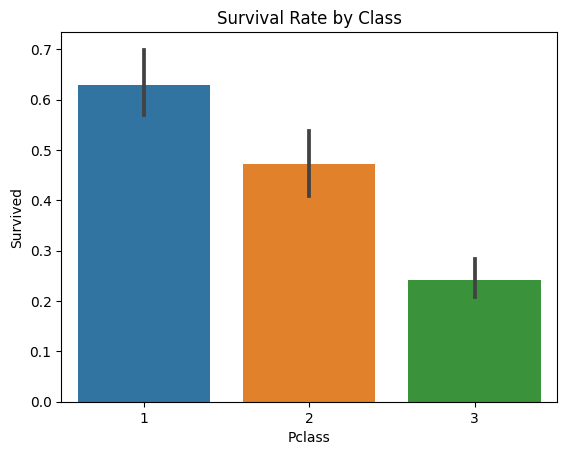

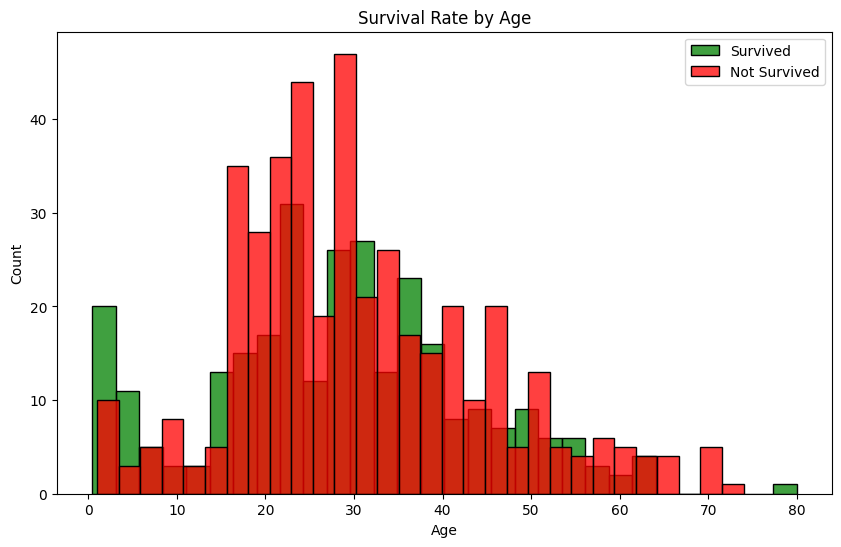

In [56]:
# Visualising the survival rate by gender(sex)

sns.barplot(x='Sex', y='Survived', data= data)
plt.title('Survival Rate by Gender')
plt.show()

# Visualize the survival rate by class
sns.barplot(x='Pclass', y='Survived', data= data)
plt.title('Survival Rate by Class')
plt.show()

# Visualize the survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Survived'] == 1]['Age'], bins=30, kde=False, color='green', label='Survived')
sns.histplot(data[data['Survived'] == 0]['Age'], bins=30, kde=False, color='red', label='Not Survived')
plt.legend()
plt.title('Survival Rate by Age')
plt.show()

<Axes: >

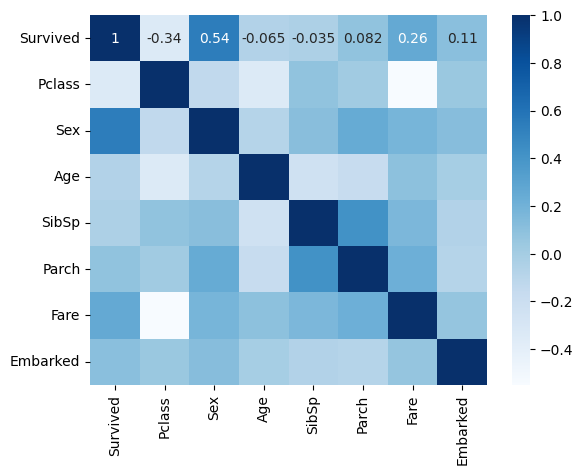

In [143]:
sns.heatmap(data.corr(), annot= True, cmap= "Blues")

In [57]:
# statistical information of our dataframe
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [76]:
# Preprocessiong data

# Filling missing age values with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing embarked values with the most common embarkation port
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column as it has too many missing values (more than half the dataset value)
data.drop('Cabin', axis=1, inplace=True)

# Convert categorical columns to numerical columns
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Drop unnecessary columns
data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [77]:
# Splitting data

X = data.drop("Survived", axis = 1)
y = data["Survived"]

In [78]:
# spliting the data in to train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify= y)

In [74]:
# Normalisation

In [84]:
# Normalising the X_train and X_test data

scaler = MinMaxScaler()

X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [85]:
# Training our data

In [88]:
# Model selection
model = LogisticRegression()

# Training our model

model.fit(X_train_normalized, y_train)

LogisticRegression()

In [90]:
# Predictions

In [94]:
y_pred = model.predict(X_test_normalized)

In [92]:
# Evaluation

In [95]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %0.2f" % accuracy)

Accuracy: 0.79


In [97]:
print('Logistic Regression')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       110
           1       0.77      0.67      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179

[[96 14]
 [23 46]]


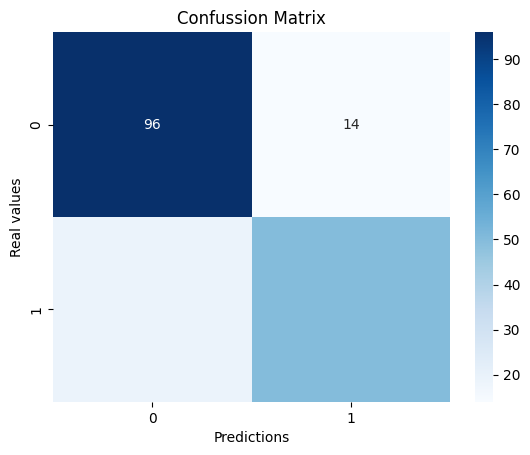

In [144]:
# Confusion matrix

confusion = confusion_matrix(y_test, y_pred)

sns.heatmap(confusion, annot= True, cmap= "Blues")
plt.xlabel("Predictions")
plt.ylabel("Real values")
plt.title("Confussion Matrix")
plt.savefig("matrice_confusion.png")
plt.show()

In [103]:
# optimising our model using Gread Search

param_grid = { "C": [0.001,0.01,1,10,50,100,500]}# configuration du paramettre du model

grid_search = GridSearchCV(model, param_grid, cv=5)

# Entrainement du model sur les jeu de test normaliser

grid_search.fit(X_train_normalized, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 1, 10, 50, 100, 500]})

In [105]:
print("Best Hyperparameters (Grid search) for the Logistique Model:", grid_search.best_params_)
print("Best Score(Grid Search) :", grid_search.best_score_)

Best Hyperparameters (Grid search) for the Logistique Model: {'C': 1}
Best Score(Grid Search) : 0.7978134541514824


In [108]:
# Using cross validation

scores = cross_val_score(model, X_train_normalized, y_train, cv=5)

In [109]:
# Displaying the validations Score

print("Cross Validations Scores : ", scores)
print("Mean precision of the model: %0.2f (+/- %0.2f)"% (scores.mean(), scores.std() * 2))
print("MAX Precision : %0.2f (+/- %0.2f)"% (scores.max(), scores.std() * 2))

Cross Validations Scores :  [0.79020979 0.76223776 0.8028169  0.82394366 0.80985915]
Mean precision of the model: 0.80 (+/- 0.04)
MAX Precision : 0.82 (+/- 0.04)


In [114]:
# Create and train the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train_normalized, y_train)

# Make predictions
y_pred = model_rf.predict(X_test_normalized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8156424581005587
Confusion Matrix:
[[96 14]
 [19 50]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179



In [115]:
# Feature importance
feature_importances = pd.DataFrame(model_rf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

print(feature_importances)

          importance
Fare        0.274793
Sex         0.258877
Age         0.249182
Pclass      0.090712
SibSp       0.050683
Parch       0.040519
Embarked    0.035234


In [120]:
# Testing our model

In [145]:
test_data = pd.DataFrame({"Pclass": [2, 2], "Sex": [0, 1], "Age": [15, 15], "SibSp": [1, 1], "Parch": [0, 0], "Fare": [40, 40], "Embarked": [2, 2]})

test = scaler.transform(test_data)
test_pred = model_rf.predict(test)

predictions_test = pd.DataFrame({"Pclass": [2, 2], "Sex": [0, 1], "Age": [15, 15], "SibSp": [1, 1], "Parch": [0, 0], "Fare": [40, 40], "Embarked": [2, 2], "Survived": test_pred})
predictions_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,0,15,1,0,40,2,0
1,2,1,15,1,0,40,2,1
